## IITGN Internship Qualification Task

### Project 5: ML for Sustainability: Satellite Data Processing for Detecting Pollution Sources 

#### -----------------------------------------------------------------------------------------------------------------------

### One-vs-Rest Classifiction

In [3]:
# importing the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
# check the number of files in a directory

# path to the directory
path = 'dataset/others'
# print the number of files in the directory
print('The number of files in the directory:', len(os.listdir(path)))

The number of files in the directory: 5339


#### I. One vs Rest Classification

#### Data Preparation

In [6]:
import os
import shutil

# Define paths
source_dir = 'animals' 
destination_dir = 'dataset/others' 

os.makedirs(destination_dir, exist_ok=True)

folders = os.listdir(source_dir)
folders.remove('raccoon')

for folder in folders:
    folder_path = os.path.join(source_dir, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):  
            shutil.copy(file_path, destination_dir)

print("Images moved successfully.")

Images moved successfully.


In [9]:
print(os.getcwd()) 

g:\IITGN


#### Augmentations

In [3]:
import os, shutil, random
from turtle import mode
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Define the path to your "Moderate demented" images
source_dir = 'dataset/raccoon'


# Create a directory to save the augmented images
augmented_dir = 'dataset/augmented_r'
os.makedirs(augmented_dir, exist_ok=True)

# Initialize the ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rescale=128./255,              # Rescale pixel values to [0, 1]
    brightness_range=[0.5, 1.5],   # Random brightness adjustment
    zoom_range=[0.8, 1.2],         # Random zooming
    fill_mode='nearest',           # Fill mode for filling pixels after augmentation
    horizontal_flip=True,          # Random horizontal flipping
    vertical_flip=True,            # Random vertical flipping
    rotation_range=30,             # Random rotations
    shear_range=0.3,               # Random shearing
)

# List all images in the "Moderate demented" directory
image_files = [i for i in os.listdir(source_dir) if i.endswith('.jpg')]
print(len(image_files))
# Set the target number of augmented images (e.g., 700)

target_count = 240

60


In [4]:
# Loop until the target count is reached
generated_count = 0
print(f'Generating {target_count} augmented images...', end='\n\n')
with tqdm(total=target_count, desc="Augmentation Progress") as pbar:
    while generated_count < target_count:
        # Randomly select an image from the original dataset
        image_file = np.random.choice(image_files)
        image_path = os.path.join(source_dir, image_file)

        # Load the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure it's in RGB format

        # Generate augmented images using the data generator
        aug_iter = datagen.flow(np.expand_dims(image, axis=0), batch_size=1)
        augmented_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(5)]  # Create 5 augmented images per original

        # Save the augmented images
        for i, aug_image in enumerate(augmented_images):
            aug_filename = f'augmented_{generated_count + i}.jpg'
            aug_image_path = os.path.join(augmented_dir, aug_filename)
            cv2.imwrite(aug_image_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))

        # Update the count of generated images
        generated_count += len(augmented_images)
        # if generated_count % 6000 == 0:
        #     print(f'{generated_count} images generated...')
        pbar.update(len(augmented_images))

print(f'Generated {generated_count} augmented images.')

Generating 240 augmented images...



Augmentation Progress: 100%|██████████| 240/240 [01:07<00:00,  3.53it/s]

Generated 240 augmented images.


#### Random Selection

In [5]:
# select random 358 images from the others folder and move them to the non_raccoon folder
import os
import random
import shutil

# Define paths
others_dir = "dataset/others"
non_raccoon_dir = "dataset/non_raccoon"

# Ensure directories exist
if not os.path.exists(others_dir):
    print(f"Directory '{others_dir}' does not exist.")
    exit()

if not os.path.exists(non_raccoon_dir):
    os.makedirs(non_raccoon_dir)

# List all images in the 'others' folder
image_files = os.listdir(others_dir)

# Select 358 random images
random_files = random.sample(image_files, 300)

# Move selected images to the 'non_raccoon' folder
for file_name in random_files:
    source_file = os.path.join(others_dir, file_name)
    destination_file = os.path.join(non_raccoon_dir, file_name)
    shutil.move(source_file, destination_file)

print("Random selection and moving completed.")

Random selection and moving completed.


#### Splitting into train and test directories

In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define the paths
source_dir = 'dataset'
target_dir = 'split'

# Create target directories if they don't exist
for split in ['train', 'test', 'val']:
    os.makedirs(os.path.join(target_dir, split, 'raccoon'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, split, 'non_raccoon'), exist_ok=True)

# Function to split data and move files
def split_data(source_dir, target_dir, class_folder):
    files = os.listdir(os.path.join(source_dir, class_folder))
    random.shuffle(files)  # Shuffle the list of files randomly
    train_files, test_val_files = train_test_split(files, test_size=0.25, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=0.4, random_state=42)

    for file in train_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'train', class_folder))
    for file in test_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'test', class_folder))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'val', class_folder))

# Perform the split for raccoon and non_raccoon classes
split_data(source_dir, target_dir, 'raccoon')
split_data(source_dir, target_dir, 'non_raccoon')

#### Resizing the original images

In [2]:
import os
from PIL import Image

# Function to resize images
def resize_images_in_directory(directory, target_size=(150, 150)):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        resized_img = img.resize(target_size)
                        resized_img.save(file_path)
                        print(f"Resized {file} to {target_size}")
                except Exception as e:
                    print(f"Error resizing {file}: {e}")

# Example usage
directory_path = ["split/test", "split/val", "split/train"]
for i in directory_path:
    resize_images_in_directory(i)

Resized 013f6503e9.jpg to (150, 150)
Resized 01c3fc5278.jpg to (150, 150)
Resized 037e83aa61.jpg to (150, 150)
Resized 060d2a2732.jpg to (150, 150)
Resized 08b84fc879.jpg to (150, 150)
Resized 08e4894318.jpg to (150, 150)
Resized 09d576db9d.jpg to (150, 150)
Resized 0be3797d3d.jpg to (150, 150)
Resized 0e3da69e47.jpg to (150, 150)
Resized 0f43a8237e.jpg to (150, 150)
Resized 180b92dc38.jpg to (150, 150)
Resized 18bf90ba80.jpg to (150, 150)
Resized 1b6ebe4c0f.jpg to (150, 150)
Resized 1c8a479812.jpg to (150, 150)
Resized 1cb123c4e9.jpg to (150, 150)
Resized 20b813bca1.jpg to (150, 150)
Resized 27c5e4bc7a.jpg to (150, 150)
Resized 2c72c1f82e.jpg to (150, 150)
Resized 2f33d89feb.jpg to (150, 150)
Resized 35b53a729c.jpg to (150, 150)
Resized 35e8e447e8.jpg to (150, 150)
Resized 38c6603160.jpg to (150, 150)
Resized 3a4bd740a0.jpg to (150, 150)
Resized 40fe0dd41d.jpg to (150, 150)
Resized 49a8a6369a.jpg to (150, 150)
Resized 5c75295aec.jpg to (150, 150)
Resized 5e39bbbcf9.jpg to (150, 150)
R

#### Custom CNN 

In [6]:
# Loading dataset
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def create_dataset_from_directory(directory):
    x = []
    y = []
    for class_label, class_name in enumerate(['non_raccoon', 'raccoon']):
        class_dir = os.path.join(directory, class_name)
        for file in os.listdir(class_dir):
            if file.endswith((".jpg", ".jpeg", ".png")):
                file_path = os.path.join(class_dir, file)
                try:
                    with Image.open(file_path) as img:
                        # Note: No resizing here, only loading and normalization
                        img = np.array(img) / 255.0  # Normalize pixel values
                        x.append(img)
                        y.append(class_label)
                except Exception as e:
                    print(f"Error loading {file}: {e}")
    return np.array(x), np.array(y)

# Define paths
train_dir = 'split/train'
test_dir = 'split/test'
val_dir = 'split/val'

# Load and preprocess images
x_train, y_train = create_dataset_from_directory(train_dir)
x_test, y_test = create_dataset_from_directory(test_dir)
x_val, y_val = create_dataset_from_directory(val_dir)

# Print shapes of datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (450, 150, 150, 3)
y_train shape: (450,)
x_test shape: (90, 150, 150, 3)
y_test shape: (90,)
x_val shape: (60, 150, 150, 3)
y_val shape: (60,)


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
# import tensorflow_addons as tfa
# from sklearn.metrics import Precision, Recall, F1Score

# Define hyperparameters
batch_size = 16
learning_rate = 0.01
epochs = 100
patience = 5

# model = Sequential([
#   Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
#   MaxPooling2D(pool_size=(2, 2)),
#   Conv2D(64, kernel_size=(3, 3), activation="relu"),
#   MaxPooling2D(pool_size=(2, 2)),
#   Flatten(),
#   Dense(128, activation="relu"),
#   Dense(1, activation="sigmoid")
# ])

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Define the optimizer with specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
csv_logger = CSVLogger('training.csv')

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping, csv_logger], batch_size=batch_size)
model.save('model.h5')
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred_binary))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# Save the training log
training_log = pd.read_csv('training.csv')

Epoch 1/100
29/29 [==============================] - 6s 74ms/step - loss: 7.1949 - accuracy: 0.5822 - val_loss: 0.5644 - val_accuracy: 0.8000
Epoch 2/100
29/29 [==============================] - 1s 41ms/step - loss: 0.4769 - accuracy: 0.8111 - val_loss: 0.5962 - val_accuracy: 0.7167
Epoch 3/100
29/29 [==============================] - 1s 41ms/step - loss: 0.4724 - accuracy: 0.8111 - val_loss: 0.4967 - val_accuracy: 0.8000
Epoch 4/100
29/29 [==============================] - 1s 42ms/step - loss: 0.3772 - accuracy: 0.8511 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 5/100
29/29 [==============================] - 1s 40ms/step - loss: 0.4106 - accuracy: 0.8311 - val_loss: 0.4749 - val_accuracy: 0.7500
Epoch 6/100
29/29 [==============================] - 1s 41ms/step - loss: 0.3379 - accuracy: 0.8778 - val_loss: 0.4281 - val_accuracy: 0.8667
Epoch 7/100
29/29 [==============================] - 1s 39ms/step - loss: 0.3085 - accuracy: 0.8867 - val_loss: 1.0080 - val_accuracy: 0.5833
Epoch 

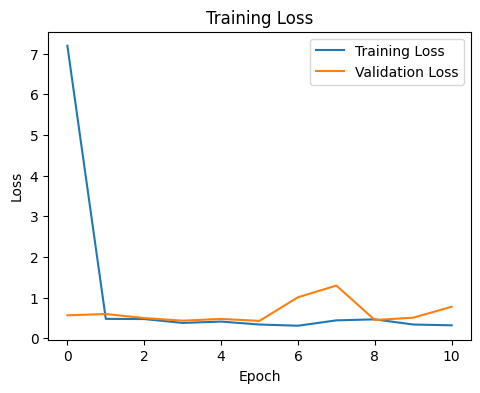

In [10]:
# import model and plot loss and accuracy graphs
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model('model.h5')

training_log = pd.read_csv('training.csv')
# Plot the training log
plt.figure(figsize=(12, 4))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(training_log['loss'], label='Training Loss')
plt.plot(training_log['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

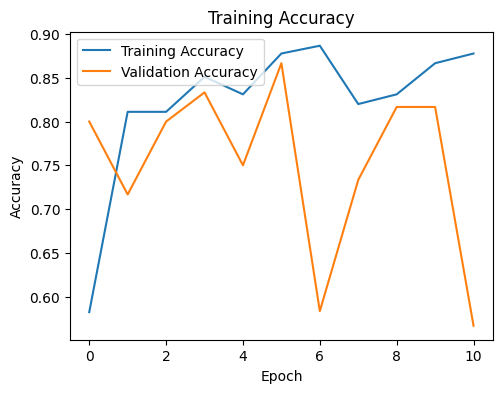

In [18]:
# Plot the training accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Raccoon', 'Raccoon'], yticklabels=['Non-Raccoon', 'Raccoon'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_pred_binary' is not defined